# Практическая работа №6: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования.

Выполнили студенты гр. 0303 Торопыгин Антон и Тишкин Максим. Вариант №1.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

Практическая работа потребует знаний: 
- в области дискретизации непрерывного сигнала;
- фильтрации дискретного сигнала с помощью дискретных нерекурсивных и рекурсивных фильтров;
- дискретного преобразования Фурье для дискретных последовательностей;
- организации вычислительных процессов.

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать. 

## Выполнение работы

1) Сформируем дискретный сигнал $x_0, x_1, ..., x_{N-1}$ посредством дискретизации $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(\omega_k t + \phi_k)$. Частота каждой из гармоник не превышает $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta \omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализуем коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\phi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включатьв  себя 32 отсчёта (N = 31).
$$x_t  =s(t_k), k = 0, 1, ..., N - 1; t_k - t_{k-1} = T, k = 1, 2, ..., N-1 $$


2) Визуализируем мисходные аналоговый и дискретизированный сигналы. Графики исходного аналогового и дискретизированного сигналов на интервале $k \in [0;31]$ представлены ниже. Из графиков видно, что сигнал периодичен с периодом N = 20.

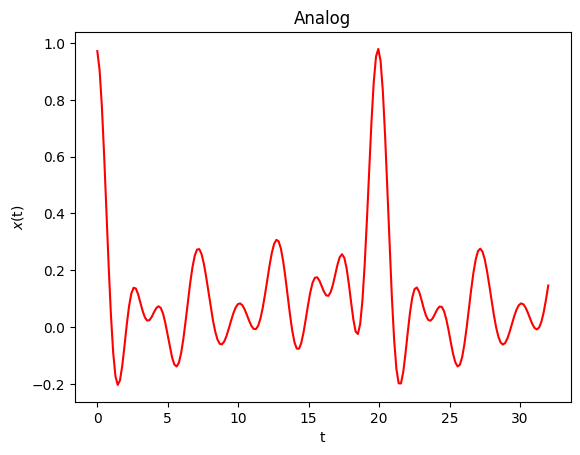

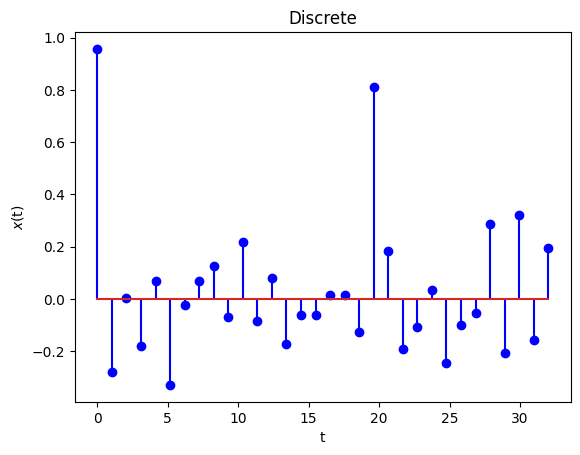

(array([ 0.        ,  1.03225806,  2.06451613,  3.09677419,  4.12903226,
         5.16129032,  6.19354839,  7.22580645,  8.25806452,  9.29032258,
        10.32258065, 11.35483871, 12.38709677, 13.41935484, 14.4516129 ,
        15.48387097, 16.51612903, 17.5483871 , 18.58064516, 19.61290323,
        20.64516129, 21.67741935, 22.70967742, 23.74193548, 24.77419355,
        25.80645161, 26.83870968, 27.87096774, 28.90322581, 29.93548387,
        30.96774194, 32.        ]),
 array([ 0.95661195, -0.28018368,  0.00390569, -0.18021808,  0.0697093 ,
        -0.32877576, -0.02337296,  0.06988656,  0.12794527, -0.06845248,
         0.21711179, -0.08594805,  0.08115957, -0.17238915, -0.06200863,
        -0.06077786,  0.01615568,  0.01458494, -0.12607605,  0.8106844 ,
         0.18340666, -0.19265656, -0.10727017,  0.03557818, -0.24615391,
        -0.09849503, -0.0542385 ,  0.28518971, -0.20750483,  0.32011036,
        -0.15794013,  0.19660123]))

In [1]:
import numpy as np
from scipy.fftpack import fft, ifft, fftshift, rfft
import matplotlib.pyplot as plt


def get_random(n):
    ws = np.arange(0, np.pi + 0.1 * np.pi, 0.1 * np.pi)
    us = np.random.random(size=11)/2.
    As = np.random.randint(1, 11, 11)
    x = np.linspace(0, 32, n)
    y = 0
    for w, u, A in zip(ws, us, As):
        y += A*np.cos(w*x + u)

    y = y / np.sum(As)

    return x, y

def task1_2(to_draw_analog = True, to_draw_discrete = True):
    x, y = get_random(200)
    x_disc, y_disc = get_random(32)
    if to_draw_analog: 
        plt.plot(x, y, 'r-')
        plt.ylabel(r'$x$(t)')
        plt.xlabel('t')
        plt.title('Analog')
        plt.show()

    if to_draw_discrete: 
        plt.stem(x_disc, y_disc, linefmt='b-')
        plt.ylabel(r'$x$(t)')
        plt.xlabel('t')
        plt.title('Discrete')
        plt.show()

    return x_disc, y_disc

task1_2()

3) С помощью ДПФ найдём дискретные отсчёты спектра дискретного сигнала и визуализируем их. Рассмотрим фрагмент последовательность ${x_k}$ из отсчётов N = 20. Получим дискретную функцию с периодом $NT$, где Т - период дискретизации:
$$ s(t) = \sum_{k=-\infty}^{+\infty} x_k\delta(t-kT) $$

Спектр $s(t)$ также должен быть периодическим (с периодом $\frac{2\pi}{T}$) и дисретным расстоянием между гармониками $\frac {2\pi} {NT}$.

Поскольку s(t) - периодическая функция, то мы можем разложить её в ряд Фурье с помощью ДПФ. Получим дискретные отсчёты спектра и визуализируем их. Полученный график дискретных отсчётов спектра дискретного сигнала представлен ниже. 

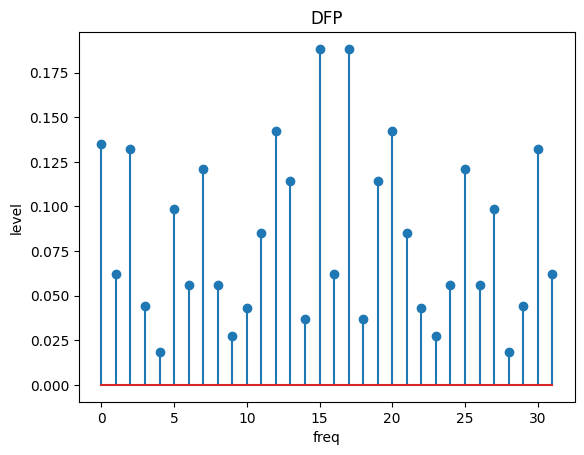

In [2]:
def task3():
    x, y = get_random(32)
    plt.stem(2*np.abs(fft(y))/32)
    plt.ylabel(r'level')
    plt.xlabel('freq')
    plt.title('DFP')
    plt.show()

task3()

4) Для дискретного сигнала применим линейное сглаживание по 5-ти и 9-ти точкам, представим формулу для $H(\omega)$ - передаточной функции (частотной характеристики) фильтра.

Передаточные функции равны:
$$H_5(\omega) = \frac {1}{5} (1 + 2cos\omega + 2 cos2\omega ) $$
$$H_9(\omega) = \frac {1}{5} (1 + 2cos\omega + 2cos2\omega + 2cos3\omega + 2cos4\omega )$$

По данным функциям выведем формулу для линейного сглаживания по 5 и 9 точкам:

$$y_{n, 5} = \frac{1}{5} \sum_{k=n-2}^{n+2} x_k $$
$$y_{n, 9} = \frac {1}{9} \sum_{k=n-4}^{n+4} x_k $$

5) Визуализируем полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом. Полученные графики представлены ниже.

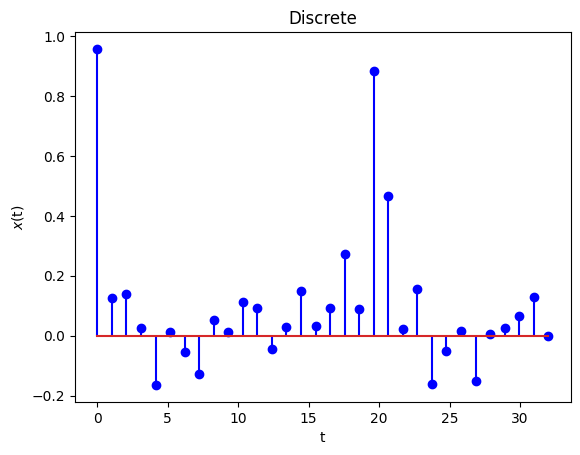

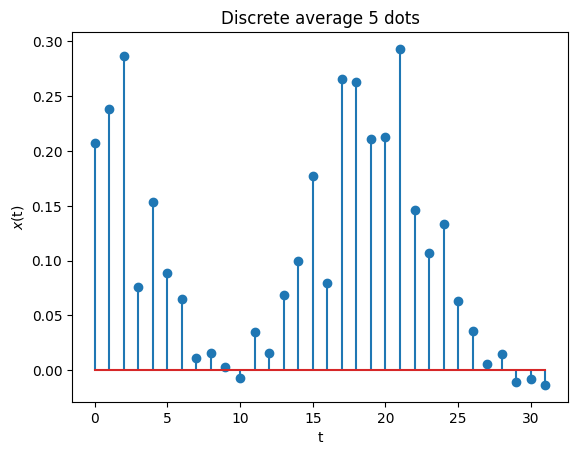

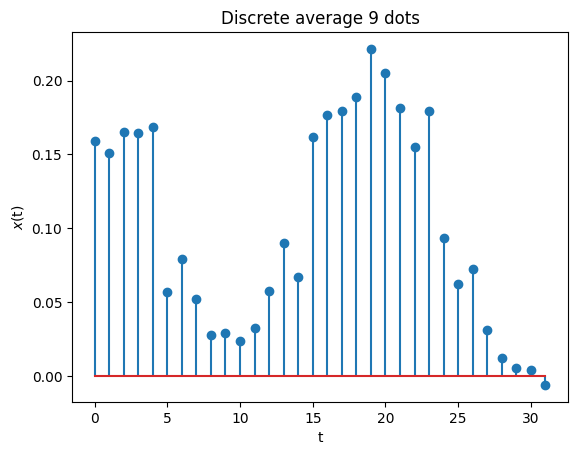

In [3]:
def task4_5():
    task1_2(to_draw_analog = False)
    x, y = get_random(32)
    av_y_5 = np.convolve(y, np.ones(5), 'same') / 5
    av_y_9 = np.convolve(y, np.ones(9), 'same') / 9
    plt.stem(av_y_5)
    plt.ylabel(r'$x$(t)')
    plt.xlabel('t')
    plt.title('Discrete average 5 dots')
    plt.show()
    plt.stem(av_y_9)
    plt.ylabel(r'$x$(t)')
    plt.xlabel('t')
    plt.title('Discrete average 9 dots')
    plt.show()
task4_5()

6) С помощью ДПФ найдём дискретные отсчёты спектра дискретного сигнала после его фильтрации и визуализируем их совместно с отчётами спектра исходного дискретного сигнала.

Дискретные преобразование Фурье:
$$X(n) = \sum_{k=0}^{N-1} y_k e^{-i \frac{2\pi n}{N} k}, n = 0, 1, 2, ..., N-1 $$

Полученные графики представлены ниже. 

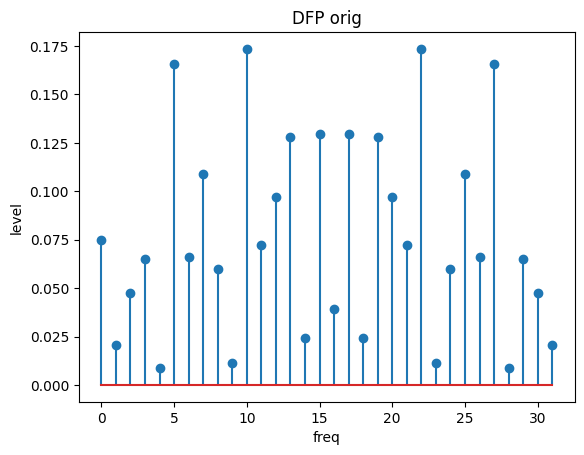

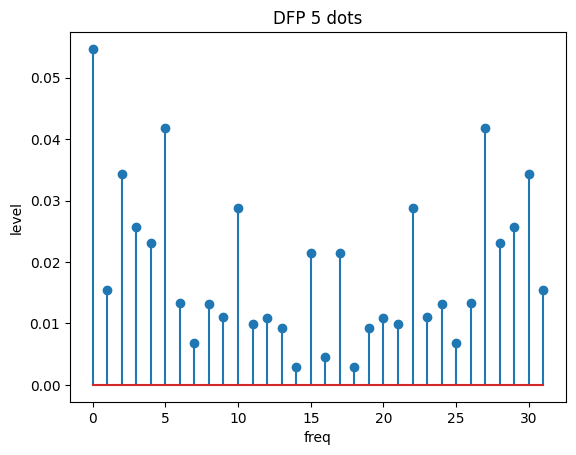

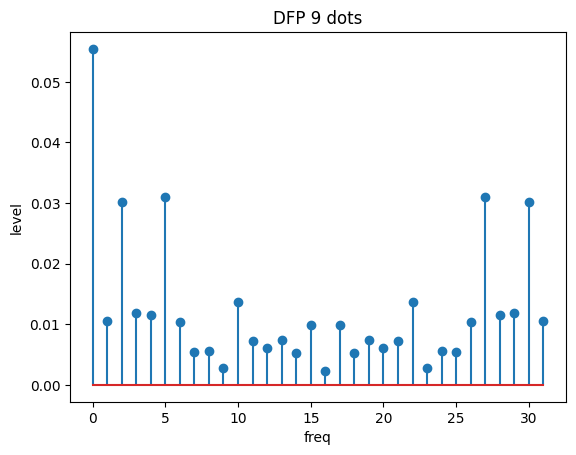

In [4]:
def task6():
    x, y = get_random(32)
    av_y_5 = np.convolve(y, np.ones(5), 'same') / 5
    av_y_9 = np.convolve(y, np.ones(9), 'same') / 9

    f = fft(y)
    f = 2*np.abs(f) / len(f)
    f_5 = fft(av_y_5)
    f_5 = 2 * np.abs(f_5) / len(f_5)
    f_9 = fft(av_y_9)
    f_9 = 2 * np.abs(f_9) / len(f_9)

    plt.stem(f)
    plt.ylabel(r'level')
    plt.xlabel('freq')
    plt.title('DFP orig')
    plt.show()

    plt.stem(f_5)
    plt.ylabel(r'level')
    plt.xlabel('freq')
    plt.title('DFP 5 dots')
    plt.show()

    plt.stem(f_9)
    plt.ylabel(r'level')
    plt.xlabel('freq')
    plt.title('DFP 9 dots')
    plt.show()
    pass
task6()

7) Проанализируем результат на соответствие значениям $H(\omega)$.

Преобразование Фуроье сопоставляет непрерывной во времени, бесконечной функции $y_n$ другую, непрерывную по частоте, бесконечную функцию - спектр $X(n)$.

Были получены графики спектра дискретного сигнала до и после линейного сглаживания по 5 и 9 точкам. Графики соответствуют ожиданиям. 

8) Повторим пп. 4-7 для следующих фильтров:

- Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.

Передаточная функция фильтра: $H(\omega) = i sin\omega$

Формула для численного дифференцирования 1-го порядка: $y_n^{'} = \frac{1}{2} (x_{n+1} - x_{n-1})$

График сигнала, полученного после фильтрации, представлен ниже.


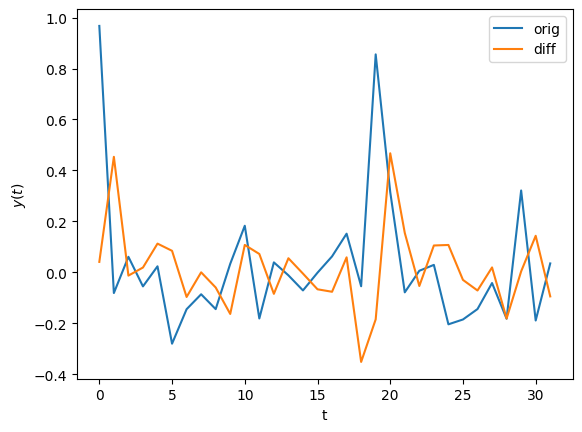

In [6]:
def task8_a_1():
    x, y = get_random(32)
    av_y_diff_1 = np.convolve(y, np.array([-1, 0, 1]), 'same') / 2

    plt.plot(y, label='orig')
    plt.plot(av_y_diff_1, label='diff')
    plt.xlabel('t')
    plt.ylabel(r'$y(t)$')
    plt.legend()
    plt.show()
    pass
task8_a_1()


С помощью ДПФ были найдены дискретные отсчёты спектра дискретного сигнала после его фильтрации. Дискретное преобразование Фурье: 

$$X(n) = \sum_{k=0}^{N-1}y_ke^{-i\frac{2\pi n}{N}k}, n=0, 1, 2, ..., N - 1$$

Графики дискретных отсчётов спектра дискретного сигнала после его фильтрации совместно с отчётами спектра исходного дискретного сигнала на интервале представлены ниже. 

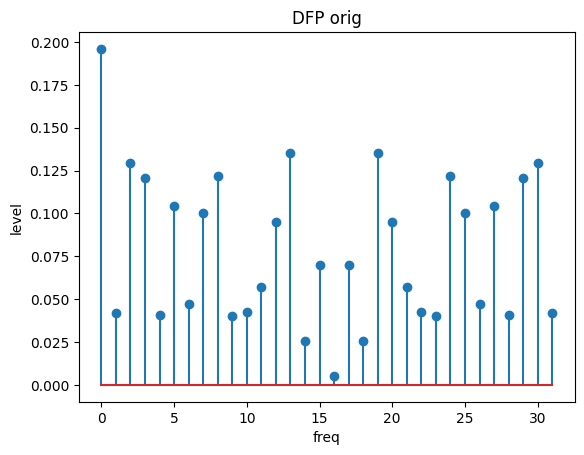

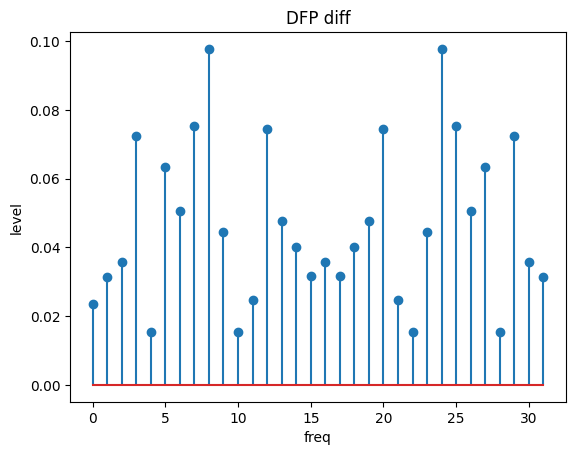

In [7]:
def task8_a_2():
    x, y = get_random(32)
    av_y_diff_1 = np.convolve(y, np.array([-1, 0, 1]), 'same') / 2

    f = fft(y)
    f = 2*np.abs(f) / len(f)
    f_5 = fft(av_y_diff_1)
    f_5 = 2 * np.abs(f_5) / len(f_5)

    plt.stem(f)
    plt.ylabel(r'level')
    plt.xlabel('freq')
    plt.title('DFP orig')
    plt.show()

    plt.stem(f_5)
    plt.ylabel(r'level')
    plt.xlabel('freq')
    plt.title('DFP diff')
    plt.show()
    pass
task8_a_2()


Преобразование Фурье сопоставляет непрерывной во времени, бесконечной функции $y_n$ другую, непрерывной по частоте, бесконечную функцию - спектр $X(n)$.

Был получен график спектра дискретного сигнала до и после применения дискретного фильтра, соответствующего численному дифференцированию 1-го порядка. График соответствует результатам.

-  Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

Для дискретного сигнала применим дискретный фильтр, соответствующий численному интегрированию (средних прямоугольников $y_1(n)$, трапеций $y_2(n)$, Симпсона $y_3(n)$):

$$y_1(n) = y_1(n-1) + x_{2n-1}$$
$$y_2(n) = y_2(n-1) + \frac{1}{2}(x_n + x_{n+1})$$
$$y_3(n+1) = y_3(n-1) + \frac{1}{3}(x_{n-1} + 4x_n + x_{n+1})$$

Представим формулу для передаточной функции фильтра:

$$H_1(\omega) =\frac{1}{2sin\frac{\omega}{2}}$$
$$H_2(\omega) =\frac{cos\frac{\omega}{2}}{2sin\frac{\omega}{2}}$$
$$H_3(\omega) =\frac{(cos\omega + 2)}{3isin\omega}$$

График, полученный после фильтрации дискретного сигнала совместно с исходным дискретным сигналом, представлен ниже.

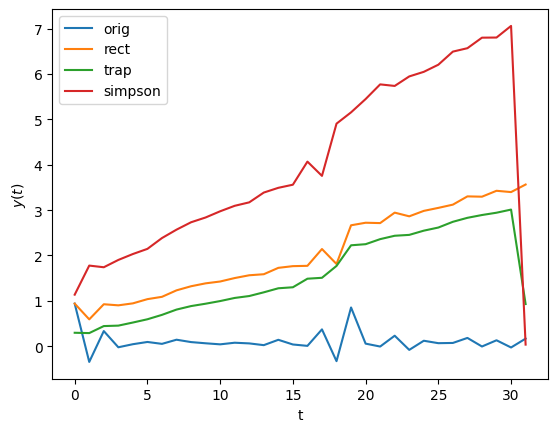

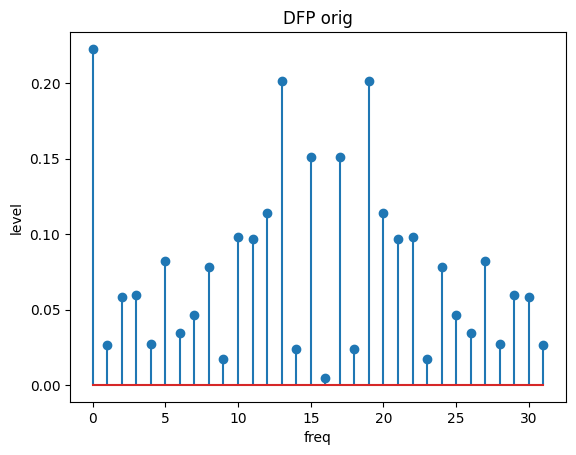

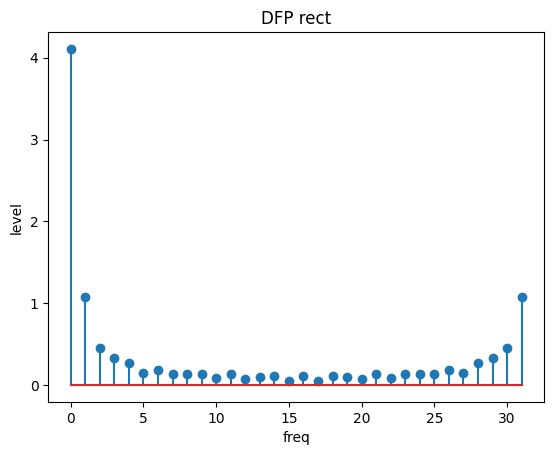

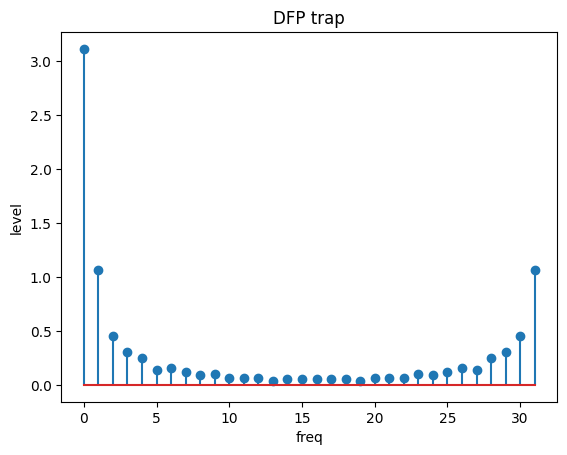

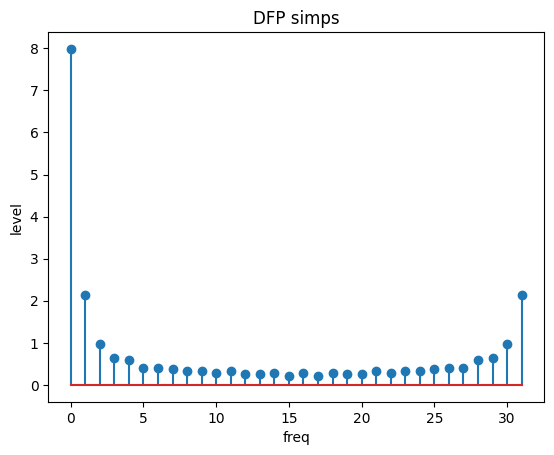

In [8]:
def rect(orig):
    integr = np.empty(len(orig))
    integr[0] = orig[0]
    for i in range(1, len(orig)):
        integr[i] = integr[i-1] + orig[i]
    return integr


def simpson(orig):
    integr = np.empty(len(orig))
    integr[0] = (0 + 4*orig[0] + orig[1]) / 3
    for i in range(1, len(orig)-1):
        integr[i] = integr[i-1] + (orig[i-1] + orig[i] + 4*orig[i+1]) / 3
    return integr


def trap(orig):
    integr = np.empty(len(orig))
    integr[0] = (orig[0] + orig[1]) / 2
    for i in range(1, len(orig)-1):
        integr[i] = integr[i - 1] + (orig[i] + orig[i+1]) / 2
    return integr


def task8_b():
    x, y = get_random(32)
    y_rect = rect(y)
    y_trap = trap(y)
    y_simps = simpson(y)

    plt.plot(y, label='orig')
    plt.plot(y_rect, label='rect')
    plt.plot(y_trap, label='trap')
    plt.plot(y_simps, label='simpson')
    plt.xlabel('t')
    plt.ylabel(r'$y(t)$')
    plt.legend()
    plt.show()

    f = fft(y)
    f = 2*np.abs(f) / len(f)
    f_rect = fft(y_rect)
    f_rect = 2 * np.abs(f_rect) / len(f_rect)
    f_trap = fft(y_trap)
    f_trap = 2 * np.abs(f_trap) / len(f_trap)
    f_simps = fft(y_simps)
    f_simps = 2 * np.abs(f_simps) / len(f_simps)

    plt.stem(f)
    plt.ylabel(r'level')
    plt.xlabel('freq')
    plt.title('DFP orig')
    plt.show()

    plt.stem(f_rect)
    plt.ylabel(r'level')
    plt.xlabel('freq')
    plt.title('DFP rect')
    plt.show()

    plt.stem(f_trap)
    plt.ylabel(r'level')
    plt.xlabel('freq')
    plt.title('DFP trap')
    plt.show()

    plt.stem(f_simps)
    plt.ylabel(r'level')
    plt.xlabel('freq')
    plt.title('DFP simps')
    plt.show()
    pass
task8_b()

Был получен график спектра дискретного сигнала до и после применения дискретного фильтра, соответствующего численному интегрированию прямоугольников, трапеций, Симпсона. График соответствует ожиданиям.

## Выводы

В ходе рабораторной работы были получены навыки выполнения фильтрации дискретных последовательностей с помощью фильтра, соответствующего численному дифференцированию 1-го порядка и фильтра, соответствующего численному интегрированию, а также анализа получаемых результатов с помощью дискретного преобразования Фурье. 